### Data Science CS4661 
## Assignment 5_1
## Yunjian Lu

In [37]:
"""
This assignment is to train a model to recognize handwriting images by using Machine Learning (Random Forest). 
"""
import numpy as np
import pandas as pd
import  matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Download the dataset “Digit” and its label from the link and check out the data set


[[  0   2  88 217 158  21   0   0]
 [ 16   0 228 236 166 253  95   0]
 [  0  41 255  44  11 182 132   3]
 [ 11  80 220   0   2 143 133   5]
 [  6  71 122   0   5 155 140   0]
 [  0  76 194   0  26 207 105  15]
 [  0  18 255  83 146 211   4   0]
 [  4   3  87 228 182   0   9   2]]


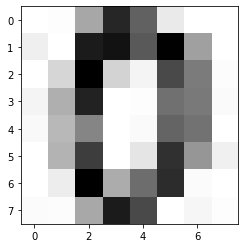

In [12]:

im1 = mpimg.imread("Digit/0.jpg")  
plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest') 
print(im1)

## B) Build the feature matrix and label vector: 

In [13]:
""" Create Data frame, convert each 8x8 image into an array of 64 elements  and put it as a row of the feature 
matrix with 64 feature columns.
"""
# reading labels from csv  
labels = pd.read_csv("label.csv")

col_names = [ i for i in range(64)]
# create empty data frame
df = pd.DataFrame(columns = col_names)

# Loop to read all image files in the Digit, then add the values to data frame
for i in range(1797):
    cur_image = mpimg.imread("Digit/{}.jpg".format(i))
    values = []
    for row in cur_image: 
        for ele in row: 
            values.append(ele)
    df.loc[i] = values

df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,2,88,217,158,21,0,0,16,0,...,4,0,4,3,87,228,182,0,9,2
1,0,0,11,187,210,78,5,0,13,5,...,0,0,0,0,0,172,251,157,0,12
2,0,0,5,59,240,199,2,0,5,0,...,92,0,0,11,0,54,173,255,138,0
3,6,0,108,255,213,13,10,0,2,131,...,168,1,0,0,118,217,226,159,0,3
4,0,6,0,34,160,7,7,0,5,0,...,7,0,0,0,2,42,250,51,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,5,0,69,160,198,102,6,0,0,24,...,61,1,3,1,39,219,246,130,13,0
1793,6,0,96,255,206,164,22,0,3,0,...,8,3,9,0,92,246,227,90,0,1
1794,5,0,22,172,242,20,0,0,0,1,...,0,16,3,0,27,152,211,87,21,0
1795,7,0,22,158,114,0,8,2,0,6,...,39,0,12,0,83,185,255,196,0,7


##  C) Split the dataset into testing and training sets

In [14]:
# Use sklearn functions to split the dataset into testing and training sets with test_size=0.1, random_state=2.

X = df

y = labels["digit label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, 
                                                    random_state=2)

## D) Use Random Forest classifier to recognize the digits

In [15]:
# Use Random Forest” classifier to recognize the hand-written digits based on the datasets that built in part (c).

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train)

y_predicted = my_RandomForest.predict(X_test)

print(y_predicted)

[4 0 9 1 8 7 1 5 1 6 6 7 6 1 5 5 7 6 2 7 4 6 4 1 5 2 9 5 4 6 5 6 3 4 0 9 9
 8 4 6 8 1 5 7 5 4 9 6 1 7 0 1 9 7 3 3 1 1 8 8 9 8 5 7 4 7 2 5 8 4 3 1 3 8
 7 3 3 0 8 7 2 8 5 3 8 7 6 4 6 2 2 0 1 1 5 3 5 7 6 8 2 2 6 4 6 7 3 7 3 9 4
 7 0 3 5 1 5 0 3 9 2 7 3 2 0 8 1 9 2 1 5 1 0 3 4 3 0 7 3 2 2 7 3 1 6 7 2 8
 3 1 1 6 4 8 2 1 8 4 1 3 1 1 9 5 4 5 7 4 8 9 5 7 6 9 4 0 4 0 0 4]


In [260]:
# calculate and report the accuracy.
accuracy = accuracy_score(y_test, y_predict)

print(accuracy)
"""
The accuracy score is 0.956, meaning that 95.6% of the predictions is valid. 
"""

0.9555555555555556


## E) Show the misclassified images

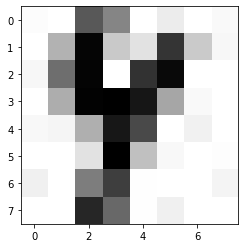

In [27]:
"""
E) Write some codes to find which one of the data samples (i.e. which images) have been misclassified 
(classified incorrectly) in your testing set.
"""
# find all indexes in y_test that is not matches y_predicted
y_indexes = y_test.index 
misclassifieds = []
i = 0
for ele in y_indexes:
    if (y_test.loc[ele]!= y_predicted[i]):
        misclassifieds.append(ele)
    i += 1

"""
Since the "plt.imshow" only shows one image at each code  block, more blocks of code is needed. 
"""
# print out one of the missed images
missed = misclassifieds[0]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 


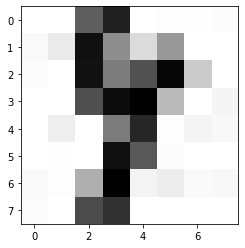

In [28]:
missed = misclassifieds[1]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 

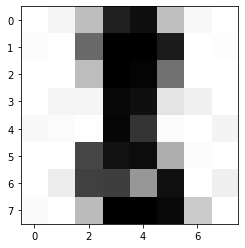

In [29]:
missed = misclassifieds[2]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 

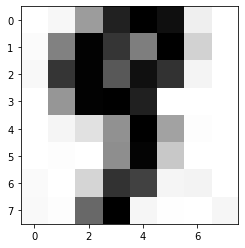

In [30]:
missed = misclassifieds[3]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 

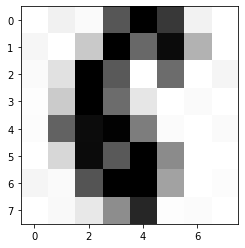

In [31]:
missed = misclassifieds[4]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 

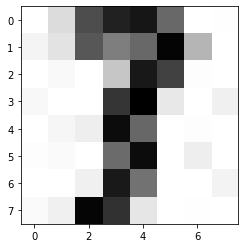

In [32]:
missed = misclassifieds[5]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 

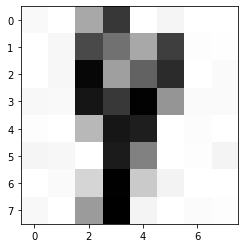

In [33]:
missed = misclassifieds[6]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 

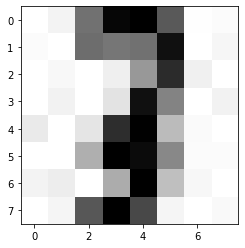

In [34]:
missed = misclassifieds[7]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 

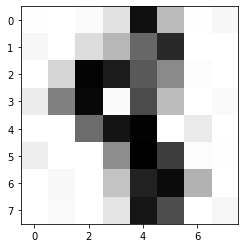

In [35]:
missed = misclassifieds[8]
cur_image = mpimg.imread("Digit/{}.jpg".format(missed))
plt.imshow(cur_image, cmap=plt.cm.gray_r, interpolation='nearest') 

In [36]:
"""
The end of Assignment. Thank You. 
"""

'\nThe end of Assignment. Thank You. \n'